In [1]:
from matplotlib import pyplot as plt
from episuite.icu import ICUAdmissions
from episuite import data

### Load the sample data and aggregate by day
First we need to load a sample dataset.

In [2]:
sample_data = data.admissions_sample()

In [3]:
sample_data.head()

,DATE_START,DATE_END,OUTCOME
0,2020-06-17,2020-08-03,RECOVERY
1,2020-06-11,2020-06-21,DEATH
2,2020-07-12,2020-08-02,DEATH
3,2020-06-25,2020-07-31,DEATH
4,2020-07-24,2020-08-16,DEATH


In [4]:
sample_data.shape

(4538, 3)

In [5]:
# Filter for only RECOVERY or DEATH outcomes
sample_data = sample_data[sample_data["OUTCOME"].isin(["RECOVERY", "DEATH"])]

In [6]:
# Build an aggregation by day
sample_data_admissions = sample_data.groupby("DATE_START").size().sort_index()

In [7]:
# Resample the DataFrame per day and fill dates without admissions with zeros
sample_data_admissions = sample_data_admissions.resample("D").sum().fillna(0)

In [8]:
sample_data_admissions.head()

DATE_START
2020-03-18    2
2020-03-19    1
2020-03-20    2
2020-03-21    1
2020-03-22    2
Freq: D, dtype: int64

As you can see, we now have a series of admissions per day indexed by **DATE_START**.

### Build the admissions object
Here we are going to build the admissions object. This class accepts any series, therefore it can be reused for other admissions such as regular hospitalizations and not only ICU.

In [9]:
admissions = ICUAdmissions(sample_data_admissions)

In [10]:
admissions

ICUAdmissions[Entries=352, Total Admissions=4431]>

### Check for data consistency
One of the major difficulties when dealing with real data is that it often comes with some issues such as duplicated dates, admissions with gaps, non-monotonicity, etc. This method below called `sanity_check()` will check for these issues and raise an exception in case of failure.

In [11]:
admissions.sanity_check()

### Visualization

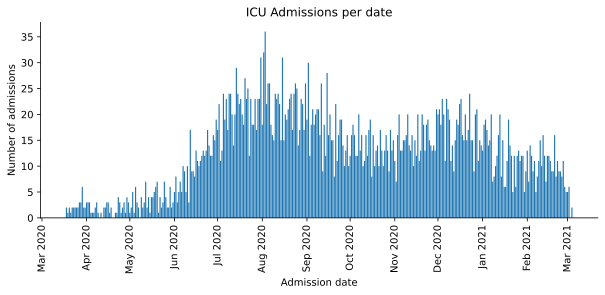

In [12]:
fig = plt.figure(figsize=(10, 4))
admissions.plot.bar()
plt.show()

Now that we have the admissions, we can proceed by using it for simulation or modelling purposes.